# Related Libraries Importing

In [1]:
import numpy as np
import os 

# Helper Functions Defination

In [2]:
# Activation functions defination
def activation_fun(x,activation_type= 'sigmoid'):
    
    if activation_type not in ['sigmoid','tanh', 'relu','lrelu']:
        raise ValueError(" activation type must be in ['sigmoid','tanh', 'relu','lrelu']")
    
    if activation_type == 'sigmoid':
        return (1/(1+np.exp(-x)))
    
    elif activation_type == 'tanh':
        return np.tanh(x)
    
    elif activation_type == 'relu':
        return np.maximum(0.0,x)
    
    elif activation_type == 'lrelu':
        return np.maximum(0.01 * x, x)

In [3]:
# Activation fumnctions derivatives
def act_derivative(x, activation_type= 'sigmoid'):

    if activation_type not in ['sigmoid','tanh', 'relu','lrelu']:
        raise ValueError(" activation type must be in ['sigmoid','tanh', 'relu','lrelu']")    
    
    if activation_type == 'sigmoid':
        return activation_fun(x, activation_type= activation_type)\
        * (1- activation_fun(x, activation_type=activation_type))
    
    elif activation_type == 'tanh':
        return 1- (activation_fun(x,activation_type= activation_type))**2
    
    elif activation_type == 'relu':
        return np.where(x <= 0.0, 0.0,1.0)
    
    elif activation_type == 'lrelu':
        return np.where(x <= 0.0, 0.01 * x,1.0)

In [4]:
# Random data generation for function
def data_generator(num_features=10, num_examples=1000,train_p=0.8):
    
    dataset = np.random.randint(0,20,size=(num_features,num_examples))
    labels = np.random.randint(0,2,(1,num_examples))
    
    x_train = dataset[:,:int(num_examples * train_p)]
    y_train = labels[:,:int(num_examples * train_p)]
    x_test = dataset[:,int(num_examples * train_p) :]
    y_test = labels[:,int(num_examples * train_p):]
    return x_train, y_train, x_test, y_test

# Deep Neural Network Formulation

In [5]:
x_train, y_train, x_test, y_test = data_generator(num_features=25, num_examples=250, train_p=0.8)

In [6]:
# parameters initiation
def initialize_parameters(layer_dims):
    
    parameters ={}
    L = len(layer_dims)
    for l in range(1,L):
        parameters['W'+ str(l)] =  np.random.randn(layer_dims[l],layer_dims[l-1])*0.1
        parameters['b'+ str(l)] =  np.zeros((layer_dims[l],1))
    
    return parameters

In [7]:
dims = [25,5,5,3,3,1]
parameters = initialize_parameters(dims)
parameters

{'W1': array([[-0.00856461,  0.16076631, -0.03807739, -0.01563543,  0.04410157,
         -0.12607876, -0.00196128, -0.08583331,  0.11473557,  0.08477582,
          0.04390488, -0.03325797, -0.03210319,  0.0407533 , -0.04050113,
         -0.15930893, -0.08073197,  0.10750188,  0.03925278,  0.08716725,
         -0.06315663, -0.15741411, -0.00577451, -0.04672446,  0.11608994],
        [-0.08707928, -0.19358666,  0.05299537,  0.04154635, -0.02671041,
          0.11818875, -0.17105245,  0.17322528,  0.039391  ,  0.17151106,
         -0.00498807,  0.00648535, -0.11670697, -0.01450226, -0.07231254,
          0.10514321,  0.12119121,  0.08373368,  0.05984428, -0.02117823,
         -0.06402668,  0.08595622, -0.14736985,  0.19953271,  0.03814788],
        [-0.02825536,  0.08658013,  0.122013  ,  0.19168594,  0.09593839,
         -0.00755112, -0.07475042, -0.03961797,  0.21435226,  0.03659246,
         -0.09343379,  0.10355889,  0.17485912,  0.08288158,  0.13174434,
         -0.13573542,  0.07055

In [8]:
def forward_prop(A_prev, parameters, activation_order):
    
    cache = {}
    
    for  l,activation in enumerate(activation_order):
        
        W = parameters['W' + str(l+1)]
        b = parameters['b' + str(l+1)]
       
        Z = np.dot(W,A_prev) + b
        A = activation_fun(Z,activation_type= activation)
        
        cache['Z' + str(l+1)]= Z
        cache['A' + str(l+1)]= A
        
        A_prev = A
    
    return cache

In [9]:
activations = ['relu','relu','relu','relu','sigmoid']
cache = forward_prop(x_train,parameters,activations)
cache

{'Z1': array([[ 1.46387320e+00,  1.31711244e+00, -2.65772231e+00,
         -9.48535548e-01,  3.05639265e-01,  2.45058654e+00,
          1.70228587e-01,  1.22489762e-01, -4.16105454e-01,
         -6.37031833e-01, -1.84120747e+00, -3.03922431e-01,
         -2.54571176e+00, -1.79500959e+00, -3.18014188e+00,
         -2.05995038e+00, -3.04253531e-01, -3.40725586e+00,
         -8.85468667e-01,  2.41492028e+00, -2.40472776e-01,
         -1.83340538e+00, -3.53651392e+00, -1.55324094e+00,
         -2.15140627e+00, -3.61912469e+00, -1.22484983e+00,
         -2.45789778e+00,  1.02085342e-01, -3.85710911e+00,
         -3.95832946e+00, -1.46900638e+00, -1.97574212e+00,
          2.47786542e-02,  3.17141162e+00,  3.48989317e-01,
          2.25432243e+00,  2.11970461e-01, -1.46835319e+00,
          1.89355698e+00, -3.39859035e-01,  1.52384648e+00,
          1.01750681e+00, -1.54927131e+00, -3.68054545e+00,
          1.49795176e+00, -4.19649532e+00, -1.60695952e+00,
         -2.17389416e+00, -5.83214

In [10]:
def compute_cost(Y, cache):
    
    AL = cache[(list(cache.keys())[-1])]
    m = Y.shape[1]
    
    cost = np.squeeze((-1/m)*(np.dot(Y,np.log(AL).T)+ np.dot((1-Y),np.log(1-AL).T)))
    assert(cost.shape == ())
    
    return cost

In [11]:
cost = compute_cost(y_train,cache)

In [12]:
def backward_prop(X,Y,parameters,cache, activation_order):
    
    AL = cache['A'+str(len(activation_order))]
    grads = {}
    dA =  - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    m = Y.shape[1]
    
    
    for l, activation in reversed(list(enumerate(activation_order))):
        
        Z = cache['Z' + str(l+1)]
        
        if l == 0:
            A_prev = X
        else:
            A_prev = cache['A' + str(l)]
            
        W = parameters['W' + str(l+1)]
        
        dZ = dA * act_derivative(Z, activation_type= activation)
        dW = (1/m) * np.dot(dZ,A_prev.T)
        db =  (1/m) * np.sum(np.dot(dZ, A_prev.T), axis = 1, keepdims =True)
        dA = np.dot(W.T,dZ)
        
        grads['dW'+ str(l+1)] = dW
        grads['db'+ str(l+1)] = db
    
    return grads

In [13]:
grads = backward_prop(x_train,y_train, parameters,cache,activations)

In [14]:
def optimize(parameters, grads, learning_rate = 0.01):
    
    L = int(len(grads)/2)+1
    
    for l in range(1,L):
        
        W = parameters['W' + str(l)]
        b = parameters['b' + str(l)]
        
        dW = grads['dW' + str(l)]
        db = grads['db' + str(l)]
        
        parameters['W' + str(l)] = W - learning_rate * dW
        parameters['b' + str(l)] = b - learning_rate * db
    
    return parameters

In [15]:
parameters = optimize(parameters,grads, learning_rate=0.02)

In [16]:
def model(X,Y, layer_dims, activation_order, num_iterations=5000,learning_rate = 0.01,print_cost=False):
    
    parameters = initialize_parameters(layer_dims)
    
    for i in range(num_iterations):
    
        cache = forward_prop(X, parameters, activation_order)
        
        cost = compute_cost(Y,cache)
        
        grads = backward_prop(X,Y,parameters,cache,activation_order)
        
        parameters = optimize(parameters,grads,learning_rate)
        
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    return parameters

In [17]:
parameters = model(x_train,y_train,dims,activations,print_cost=True, learning_rate=0.1)

Cost after iteration 0: 0.693138
Cost after iteration 1000: 0.686944
Cost after iteration 2000: 0.684448
Cost after iteration 3000: 0.562836
Cost after iteration 4000: 0.482019


In [18]:
def predict(X, y, parameters, activation_order):
    
    m = X.shape[1]
    p = np.zeros((1,m))
    
    # Forward propagation
    cache = forward_prop(X,parameters,activation_order)
    probas = cache[(list(cache.keys())[-1])]

    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    print("Accuracy: "  + str(np.sum((p == y)/m)))

In [19]:
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

In [20]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_dataset()

y = 1. It's a cat picture.


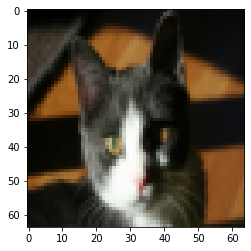

In [21]:
index = 19
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [22]:
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [23]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [24]:
dims = [12288,20,7,5,1]
activations = ['relu','relu','relu','sigmoid']
parameters = model(train_x,train_y,dims,activations,print_cost=True, learning_rate=0.0075,num_iterations= 6100)

Cost after iteration 0: 0.693394
Cost after iteration 1000: 0.626281
Cost after iteration 2000: 0.547561
Cost after iteration 3000: 0.201721
Cost after iteration 4000: 0.213043
Cost after iteration 5000: 0.120290
Cost after iteration 6000: 0.010704


In [25]:
predict(train_x,train_y,parameters,activations)

Accuracy: 0.9999999999999998


In [26]:
predict(test_x,test_y,parameters,activations)

Accuracy: 0.72


# This is the end of the story